In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing


In [250]:
df=pd.read_csv("Fraud_check.csv")
df.head()

Undergrad Marital.Status  ...  Work.Experience  Urban
0        NO         Single  ...               10    YES
1       YES       Divorced  ...               18    YES
2        NO        Married  ...               30    YES
3       YES         Single  ...               15    YES
4        NO        Married  ...               28     NO

[5 rows x 6 columns]

In [251]:
df.shape

(600, 6)

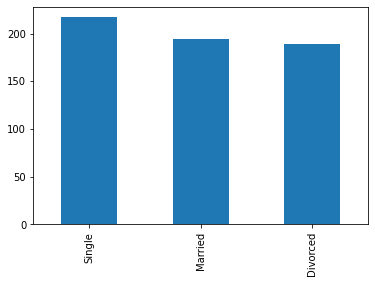

In [252]:
df["Marital.Status"].value_counts().plot.bar() #unique values

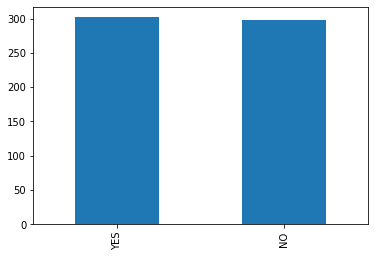

In [253]:
df["Urban"].value_counts().plot.bar()

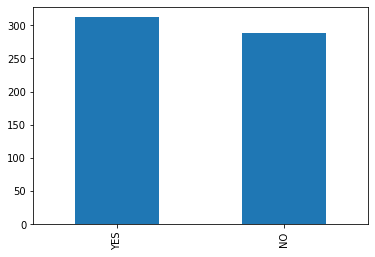

In [254]:
df["Undergrad"].value_counts().plot.bar()

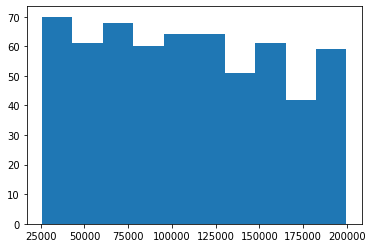

In [255]:
plt.hist(df["City.Population"])
plt.show()

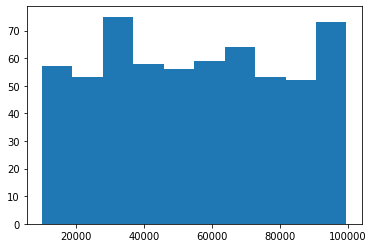

In [256]:
plt.hist(df["Taxable.Income"])
plt.show()

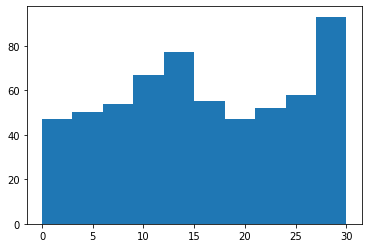

In [257]:
plt.hist(df["Work.Experience"])
plt.show()

In [258]:
df.isna().sum() #no null values 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

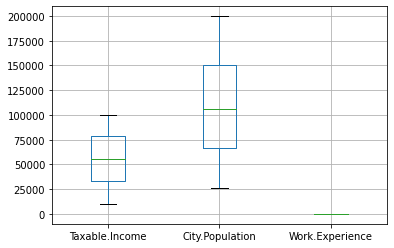

In [259]:
df.boxplot()

In [260]:
df["fraud"]=np.where(df["Taxable.Income"]<=30000,1,0)  # 0 is for good and 1 for risky
df   


Undergrad Marital.Status  Taxable.Income  ...  Work.Experience  Urban fraud
0          NO         Single           68833  ...               10    YES     0
1         YES       Divorced           33700  ...               18    YES     0
2          NO        Married           36925  ...               30    YES     0
3         YES         Single           50190  ...               15    YES     0
4          NO        Married           81002  ...               28     NO     0
..        ...            ...             ...  ...              ...    ...   ...
595       YES       Divorced           76340  ...                7    YES     0
596       YES       Divorced           69967  ...                2    YES     0
597        NO       Divorced           47334  ...                0    YES     0
598       YES        Married           98592  ...               17     NO     0
599        NO       Divorced           96519  ...               16     NO     0

[600 rows x 7 columns]

## converting independent variable into numerical

In [261]:
le=preprocessing.LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df["Urban"]=le.fit_transform(df["Urban"])

In [262]:
#dropping taxceble income 
df.drop(columns="Taxable.Income",inplace=True)

# splitting data into train test

In [263]:
x=df.iloc[:,0:5].values
y=df["fraud"]

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

**using grid search for best max_depth**

In [265]:
from sklearn.model_selection import GridSearchCV


In [266]:
n = np.array(range(1,21))
param_grid = dict(max_depth=n)
param_grid

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

In [267]:
model=DecisionTreeClassifier(criterion="gini")
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [268]:
print(grid.best_score_)
print(grid.best_params_)

0.8
{'max_depth': 1}


**using best parmeter to make decision tree**

In [269]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [270]:
pred=model.predict(x_test)

In [271]:
print(np.round(np.mean(pred==y_test)*100,2),"%") #Accurancy

76.67 %


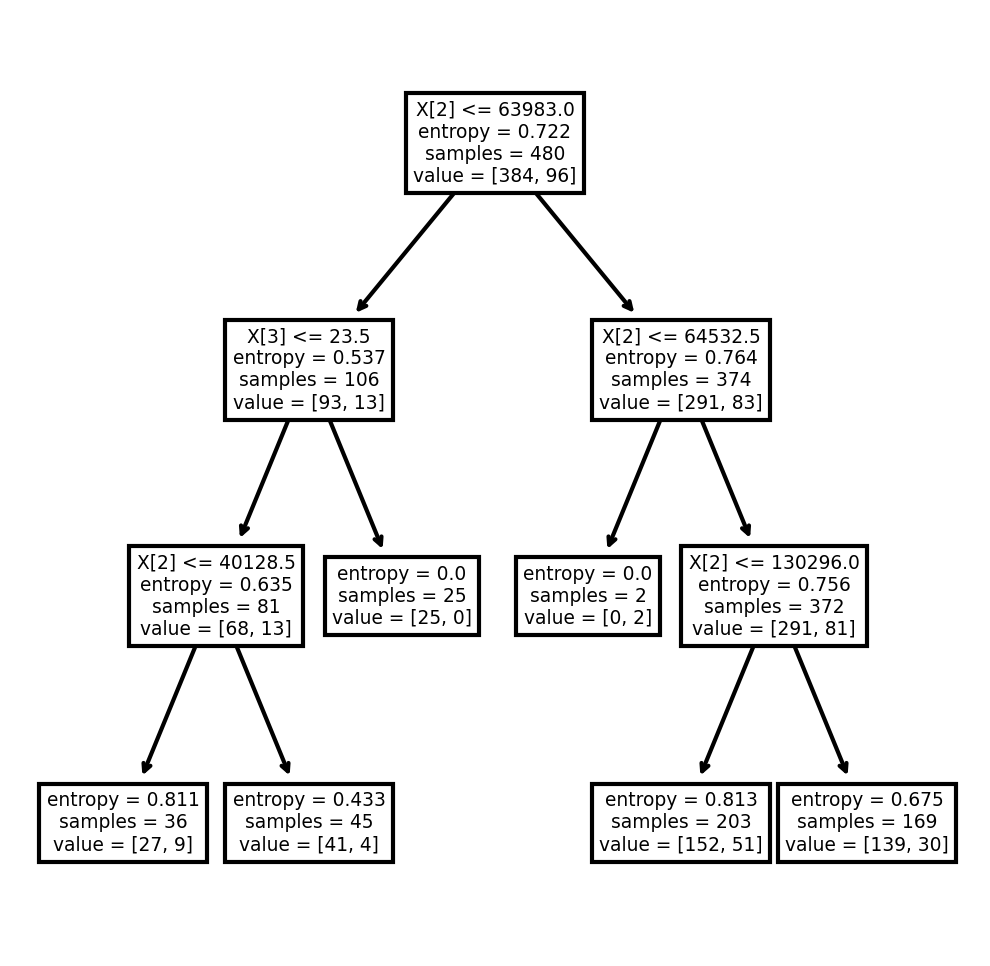

In [272]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
plt.show()

[Text(0.5, 0.875, 'City Population <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = 0(Good)'),
 Text(0.3, 0.625, 'Work Experience <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = 0(Good)'),
 Text(0.2, 0.375, 'City Population <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]\nclass = 0(Good)'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]\nclass = 0(Good)'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]\nclass = 0(Good)'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 0(Good)'),
 Text(0.7, 0.625, 'City Population <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]\nclass = 0(Good)'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1(Risky)'),
 Text(0.8, 0.375, 'City Population <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]\nclass = 0(Good)'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]\nclass = 0(G

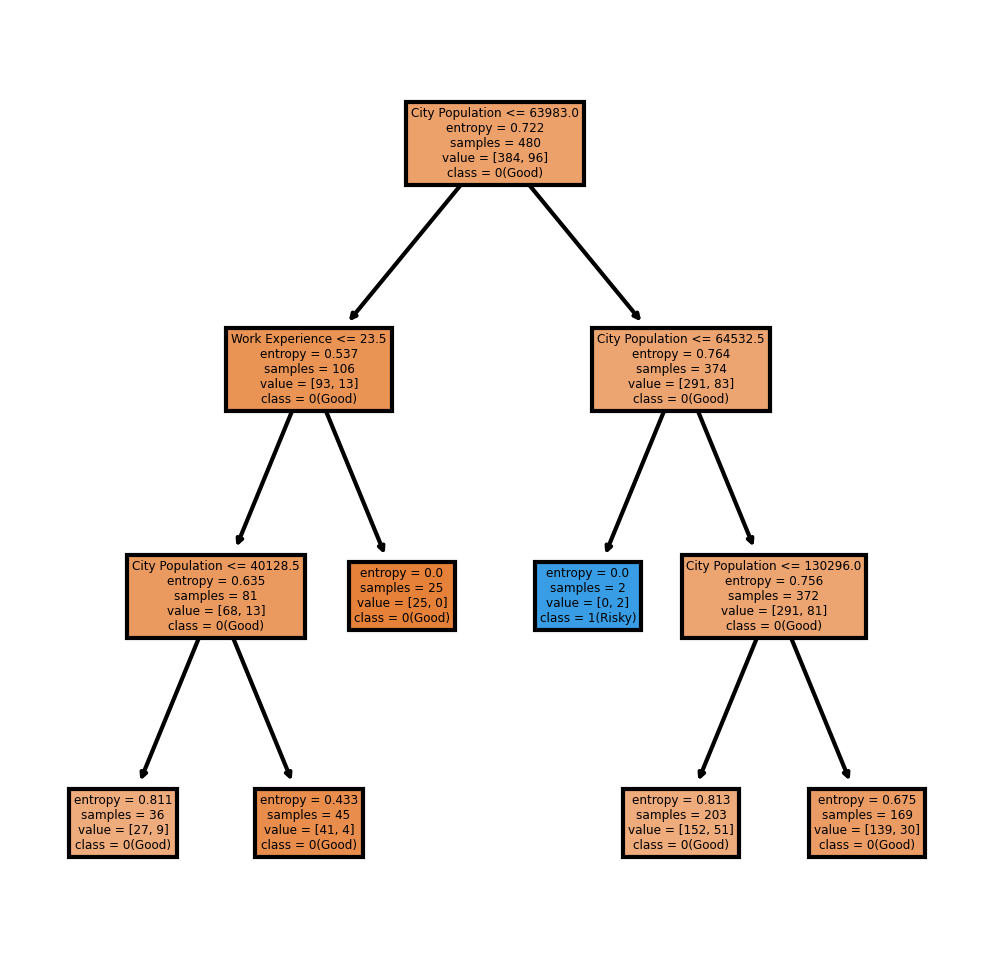

In [273]:
fn =['Undergrad','Marital Status','City Population','Work Experience','Urban']
cn=["0(Good)", "1(Risky)"]
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)